In [1]:
import tensorflow as tf
import os
# from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2 as cv
import imghdr

In [5]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Image not in ext list data\untitled_project\oracle.json
Issue with image data\untitled_project\trial_0
Issue with image data\untitled_project\trial_00
Issue with image data\untitled_project\trial_01
Issue with image data\untitled_project\trial_02
Issue with image data\untitled_project\trial_1
Issue with image data\untitled_project\trial_2
Issue with image data\untitled_project\trial_3
Issue with image data\untitled_project\trial_4


In [7]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

In [8]:
image_path = os.path.join(data_dir, 'Horses', 'gettyimages-1144833913.jpg')
image_array = cv.imread(image_path)
image_array

array([[[132, 116, 109],
        [133, 117, 110],
        [133, 117, 110],
        ...,
        [174, 183, 193],
        [172, 181, 191],
        [171, 180, 190]],

       [[133, 117, 110],
        [132, 116, 109],
        [130, 114, 107],
        ...,
        [174, 183, 193],
        [172, 181, 191],
        [172, 181, 191]],

       [[135, 119, 112],
        [133, 117, 110],
        [130, 114, 107],
        ...,
        [172, 181, 191],
        [171, 180, 190],
        [172, 181, 191]],

       ...,

       [[ 49,  66,  62],
        [ 47,  64,  61],
        [ 46,  64,  63],
        ...,
        [129, 138, 171],
        [130, 141, 171],
        [120, 134, 162]],

       [[ 38,  52,  50],
        [ 35,  49,  48],
        [ 39,  60,  58],
        ...,
        [ 36,  40,  65],
        [ 66,  72, 101],
        [ 92, 100, 137]],

       [[ 27,  43,  42],
        [ 28,  44,  43],
        [ 33,  57,  55],
        ...,
        [  2,   2,  14],
        [  8,  11,  25],
        [ 23,  26,  47]]

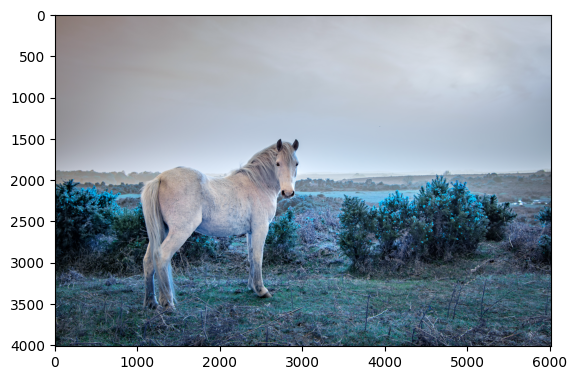

In [9]:
plt.imshow(image_array)
plt.show()

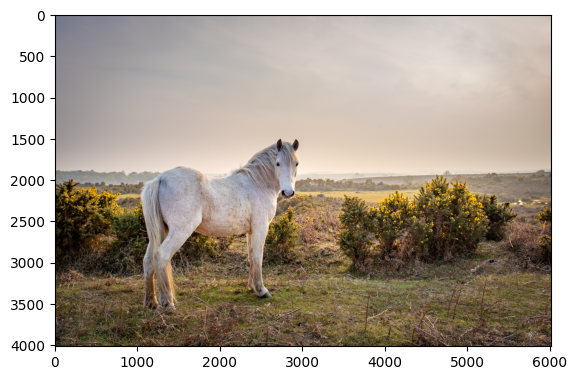

In [10]:
real_img = cv.cvtColor(image_array, cv.COLOR_BGR2RGB)
plt.imshow(real_img)

In [11]:
# image_dataset_from_directory??
data_dir = "data"
# tf.keras.utils.image_dataset_from_directory??

In [12]:
train_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
    label_mode="int",
  validation_split=0.2,
  subset="training",
  seed=123)
val_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
    label_mode="int",
  validation_split=0.2,
  subset="validation",
  seed=123)

Found 322 files belonging to 4 classes.
Using 258 files for training.
Found 322 files belonging to 4 classes.
Using 64 files for validation.


tf.Tensor([2 0 0 0 1 2 0 0 0 0 1 1 0 2 0 2 0 1 2 0 0 1 0 0 0 2 2 1 0 1 0 0], shape=(32,), dtype=int32)
tf.Tensor(
[[[[ 45.990723   66.99072    49.990723 ]
   [ 44.972168   65.97217    48.972168 ]
   [ 44.89795    64.96045    48.27295  ]
   ...
   [210.10791   228.39014   197.2793   ]
   [208.62158   227.62158   195.91846  ]
   [211.32959   230.32959   198.62646  ]]

  [[ 43.47998    63.47998    51.47998  ]
   [ 45.         65.         53.       ]
   [ 46.         66.3125     52.75     ]
   ...
   [189.43262   212.125     173.94043  ]
   [183.48682   207.15088   166.57031  ]
   [181.11035   205.77441   159.646    ]]

  [[ 32.         61.         43.       ]
   [ 32.790527   60.209473   43.       ]
   [ 33.393066   60.393066   43.393066 ]
   ...
   [174.98389   198.67139   148.04639  ]
   [171.1875    195.1875    147.1875   ]
   [169.74219   192.78857   146.6958   ]]

  ...

  [[ 34.773438   37.773438   46.773438 ]
   [ 34.912598   37.912598   46.912598 ]
   [ 36.72168    38.78418    48.

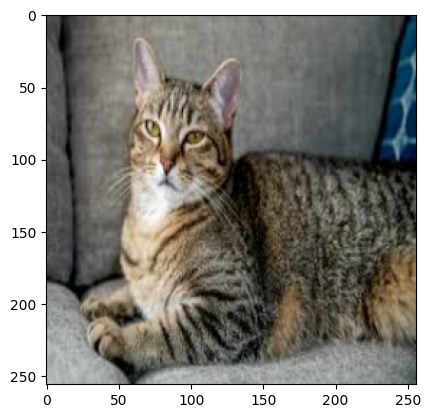

In [13]:
class_names = train_data.class_names
class_names
batch = train_data.take(1)
images, labels = next(iter(batch))
print(labels)
print(images)
plt.imshow(images[16].numpy().astype("uint8"))
plt.show()

(32, 256, 256, 3)
(32,)
(32, 256, 256, 3)
(32,)
(32, 256, 256, 3)
(32,)
(32, 256, 256, 3)
(32,)
(32, 256, 256, 3)
(32,)
(32, 256, 256, 3)
(32,)
(32, 256, 256, 3)
(32,)
(32, 256, 256, 3)
(32,)
(32, 256, 256, 3)
(32,)


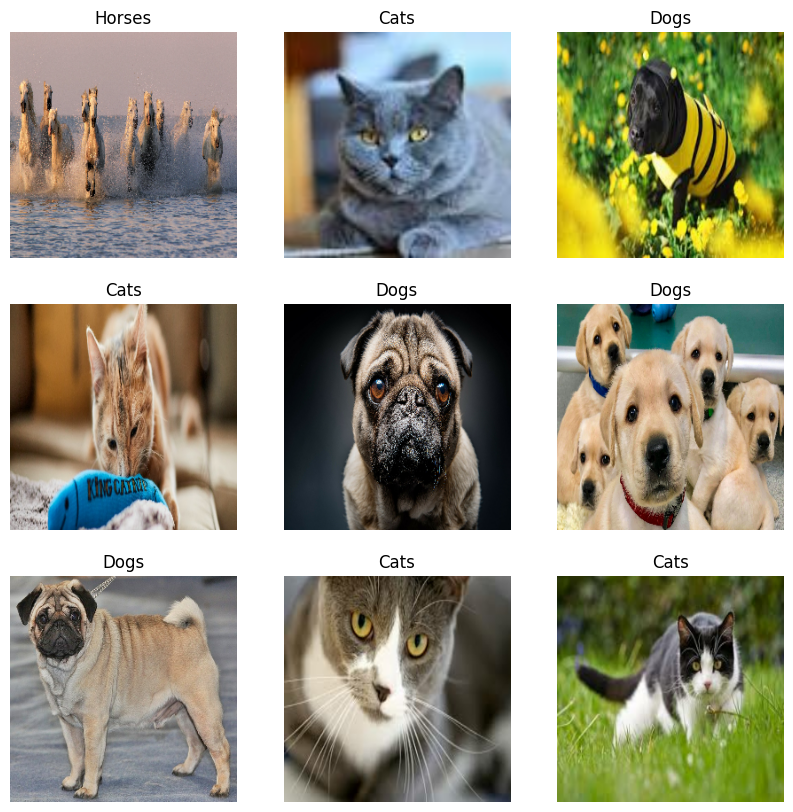

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    print(images.shape)
    print(labels.shape)
    ax = plt.subplot(3, 3, i + 1)
    
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [17]:
normalization_layer = layers.Rescaling(1./255)

In [18]:
normalized_ds = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 1.0


In [19]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
import keras_tuner

In [20]:
# def build_model(hp):
#   model = keras.Sequential()
#   model.add(keras.layers.Dense(
#       hp.Choice('units', [8, 16, 32, 64]),
#       activation='relu'))
#   model.add(keras.layers.Dense(1, activation='relu'))
#   model.compile(loss='mse')
#   return model

# def build_model(hp):
#     model = keras.Sequential()
#     model.add(layers.Conv2D(
#         filters=hp.Choice('num_filters', [32, 64, 128]),
#         kernel_size=3,
#         activation='relu',
#         ))
#     model.add(layers.MaxPooling2D(pool_size=2))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(
#         units=hp.Choice('hidden_units', [64, 128, 256]),
#         activation='relu'))
#     model.add(layers.Dense(10, activation='softmax'))
#     model.compile(
#         optimizer=keras.optimizers.Adam(
#             hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
#         loss='sparse_categorical_crossentropy',
#         metrics=['accuracy'])
#     return model

def build_model(hp):
    model = keras.Sequential()
    
    # First Conv2D layer
    model.add(layers.Conv2D(
        filters=hp.Choice('num_filters_1', [32, 64, 128]),
        kernel_size=hp.Choice('kernel_size_1', [3, 5]),
        activation='relu',
        
    ))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    # Second Conv2D layer
    model.add(layers.Conv2D(
        filters=hp.Choice('num_filters_2', [32, 64, 128]),
        kernel_size=hp.Choice('kernel_size_2', [3, 5]),
        activation='relu',
    ))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    # Third Conv2D layer
    model.add(layers.Conv2D(
        filters=hp.Choice('num_filters_3', [32, 64, 128]),
        kernel_size=hp.Choice('kernel_size_3', [3, 5]),
        activation='relu',
    ))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Int('units', min_value=32, max_value=512, step=32),
        activation='relu'
    ))
    model.add(layers.Dense(3))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2)
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [21]:
# tuner = keras_tuner.RandomSearch(
#     build_model,
#     objective='val_loss',
#     max_trials=5)
tuner =keras_tuner.RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=3,
    directory='data',
    )

In [22]:
try:
    tuner.search(train_data, epochs=10, validation_data=val_data)
except Exception as e:
    print(e)

Trial 3 Complete [00h 02m 21s]
accuracy: 0.3139534890651703

Best accuracy So Far: 0.42248061299324036
Total elapsed time: 00h 17m 51s
INFO:tensorflow:Oracle triggered exit


In [23]:
best_model = tuner.get_best_models()[0]
best_model

In [24]:
# best_model.summary()

In [25]:
num_classes = len(class_names)
print(num_classes)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(480, activation='relu'),
  layers.Dense(num_classes)
])

4


In [26]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.00095074),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      102464    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)       

In [27]:
epochs=10
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/10
9/9 [==============================] - 44s 5s/step - loss: 2.2703 - accuracy: 0.3062 - val_loss: 1.1137 - val_accuracy: 0.5312
Epoch 2/10
9/9 [==============================] - 46s 5s/step - loss: 1.1805 - accuracy: 0.3101 - val_loss: 1.1176 - val_accuracy: 0.2656
Epoch 3/10
9/9 [==============================] - 43s 5s/step - loss: 1.0944 - accuracy: 0.3605 - val_loss: 1.0020 - val_accuracy: 0.5312
Epoch 4/10
9/9 [==============================] - 44s 5s/step - loss: 1.0842 - accuracy: 0.3837 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 5/10
9/9 [==============================] - 43s 5s/step - loss: 1.0656 - accuracy: 0.3953 - val_loss: 0.9411 - val_accuracy: 0.5469
Epoch 6/10
9/9 [==============================] - 43s 5s/step - loss: 0.9776 - accuracy: 0.4767 - val_loss: 1.1135 - val_accuracy: 0.5312
Epoch 7/10
9/9 [==============================] - 44s 5s/step - loss: 1.0181 - accuracy: 0.5620 - val_loss: 0.9467 - val_accuracy: 0.5625
Epoch 8/10
9/9 [==================

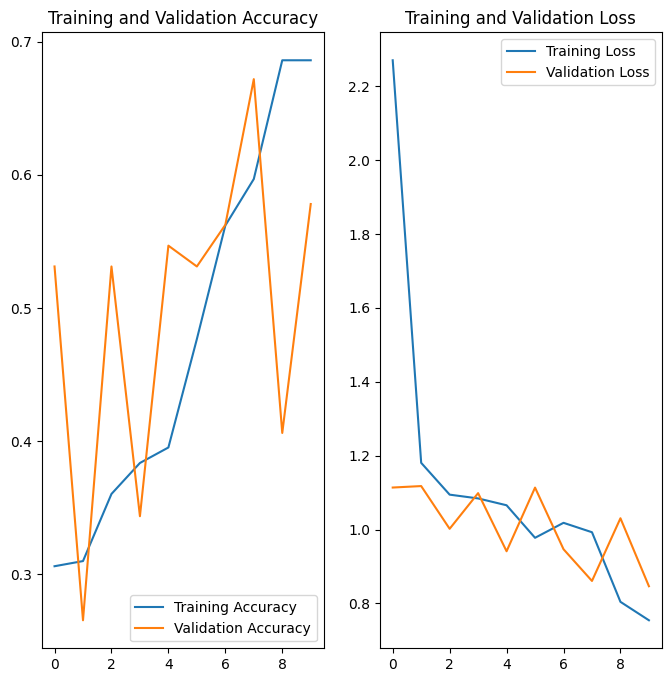

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("vertical",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

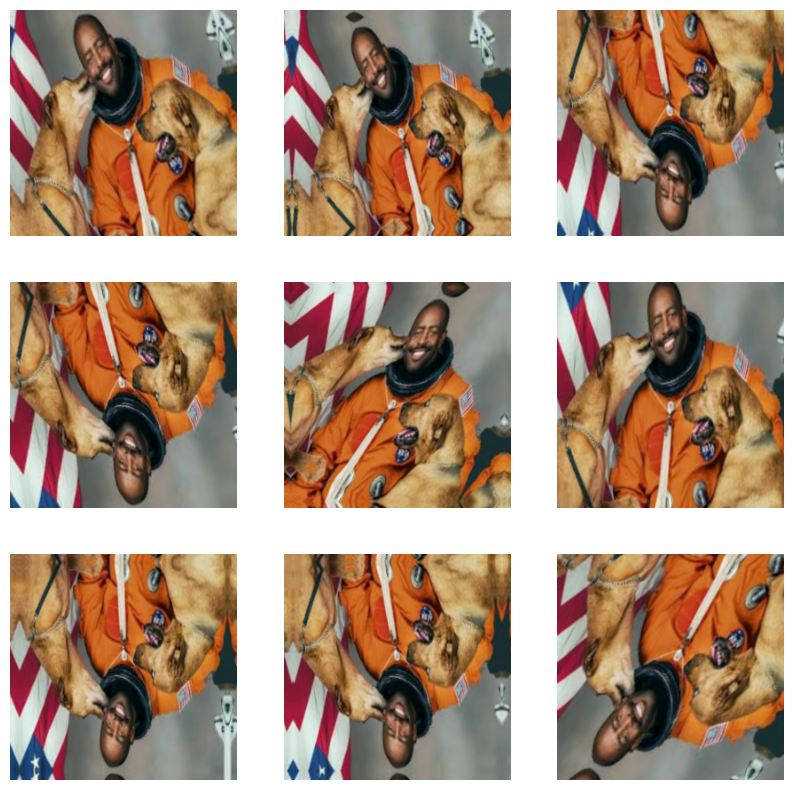

In [30]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [31]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(480, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [32]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.00095074),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      102464    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                  

In [33]:
epochs = 15
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/15
9/9 [==============================] - 46s 5s/step - loss: 2.8161 - accuracy: 0.3023 - val_loss: 1.1770 - val_accuracy: 0.5312
Epoch 2/15
9/9 [==============================] - 51s 6s/step - loss: 1.2256 - accuracy: 0.2946 - val_loss: 1.0442 - val_accuracy: 0.5312
Epoch 3/15
9/9 [==============================] - 48s 5s/step - loss: 1.0978 - accuracy: 0.4186 - val_loss: 1.1076 - val_accuracy: 0.3281
Epoch 4/15
9/9 [==============================] - 47s 5s/step - loss: 1.1187 - accuracy: 0.3992 - val_loss: 1.0852 - val_accuracy: 0.3750
Epoch 5/15
9/9 [==============================] - 50s 5s/step - loss: 1.0300 - accuracy: 0.4690 - val_loss: 0.9854 - val_accuracy: 0.5469
Epoch 6/15
9/9 [==============================] - 45s 6s/step - loss: 1.0048 - accuracy: 0.4690 - val_loss: 1.0321 - val_accuracy: 0.5000
Epoch 7/15
9/9 [==============================] - 44s 5s/step - loss: 0.9442 - accuracy: 0.5233 - val_loss: 0.9799 - val_accuracy: 0.5625
Epoch 8/15
9/9 [==================

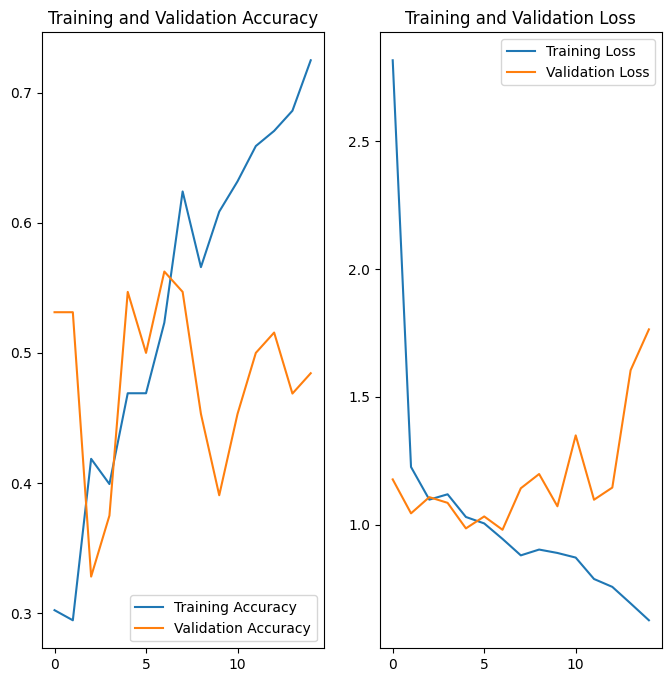

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
horse_url = "./Horsey.PNG"
# horse_path = tf.keras.utils.get_file('Horse', origin=horse_url)

img = tf.keras.utils.load_img(
    horse_url, target_size=(256,256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 64ms/step
This image most likely belongs to Dogs with a 94.79 percent confidence.
